In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid")

In [4]:
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")

## Categorical plots

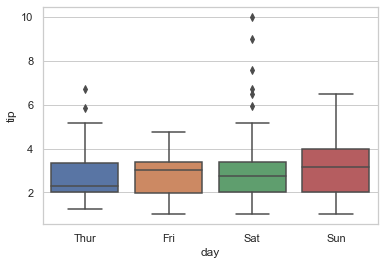

In [7]:
sns.boxplot(x="day",y="tip", data = tips)

Text(0.5, 1.0, 'Day-wise Total Bill for Male and Female')

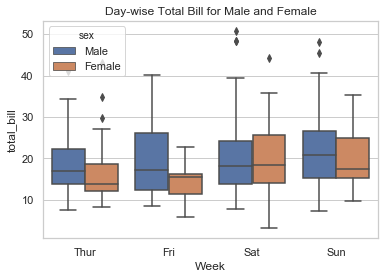

In [12]:
ax = sns.boxplot(x="day",y="total_bill", hue="sex", data = tips)
ax.set_xlabel("Week")
ax.set_title("Day-wise Total Bill for Male and Female")

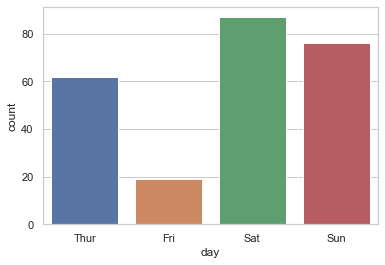

In [5]:
sns.countplot(x="day",data = tips)

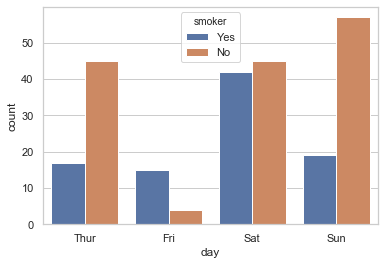

In [6]:
sns.countplot(x="day",data = tips, hue="smoker")

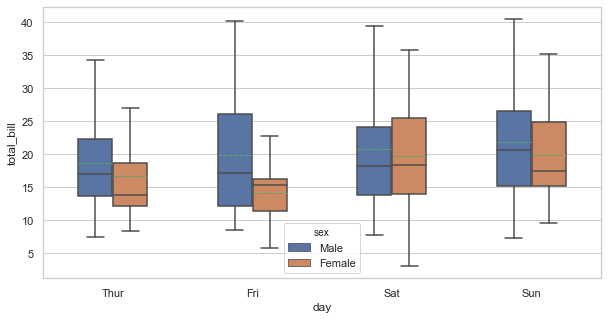

In [14]:
# Add extra parameters realted to matplotlib
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="day",y="total_bill",hue="sex", data = tips,
            showmeans=True, meanline=True, showfliers=False, width=0.5)

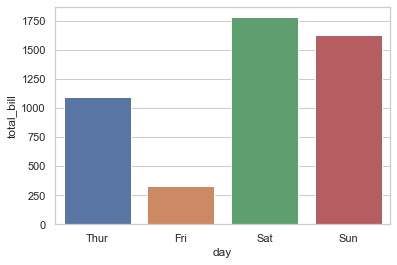

In [15]:
# Default estimator is mean 
sns.barplot(x="day",y="total_bill", ci=False, data = tips,estimator=sum)

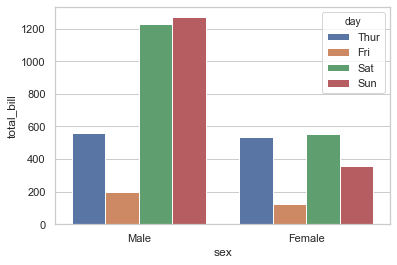

In [18]:
sns.barplot(x="sex",y="total_bill", hue="day", ci=False, data = tips,estimator=sum)

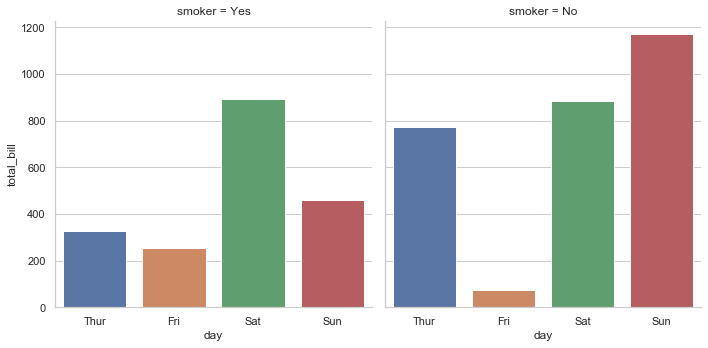

In [19]:
# Figure level API
sns.catplot(x="day",y="total_bill",data=tips,col="smoker", kind='bar', ci=False, estimator=sum)

Text(0.5, 0.98, 'Day-wise Average Total Bill for Different Sizes')

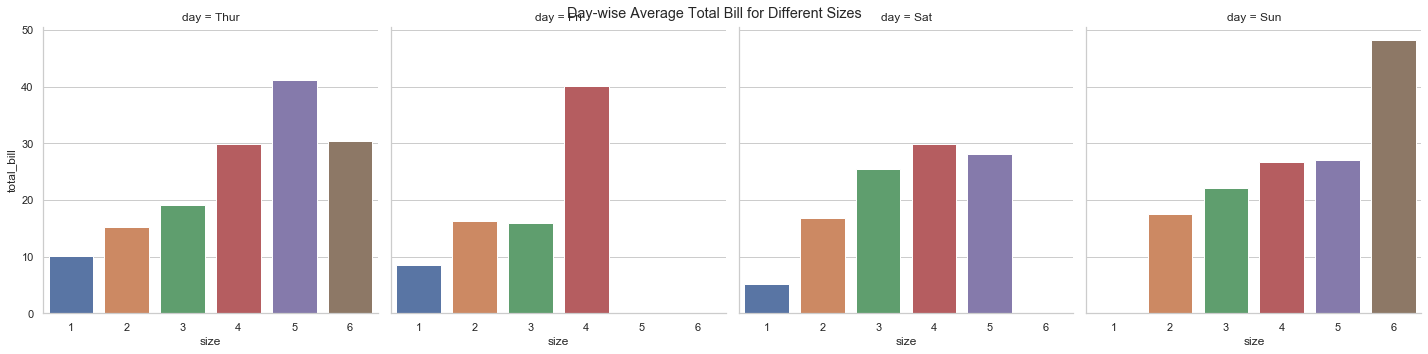

In [20]:
# Figure level API
# plt.gcf().subplots_adjust(top=0.8)
ax = sns.catplot(x="size",y="total_bill",data=tips, col="day", kind='bar', ci=False)
ax.fig.suptitle("Day-wise Average Total Bill for Different Sizes")

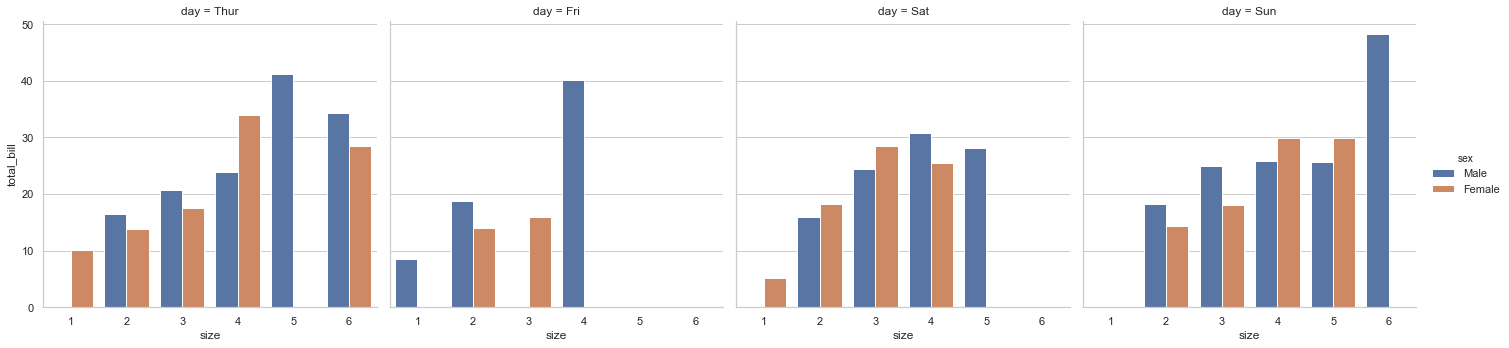

In [21]:
ax = sns.catplot(x="size",y="total_bill",data=tips, col="day", hue='sex', kind='bar', ci=False)

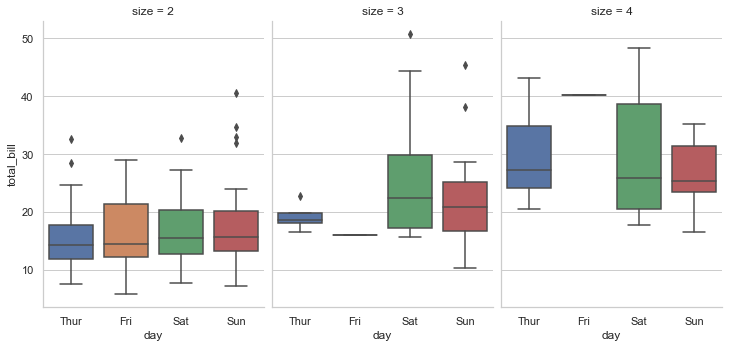

In [22]:
seltips = tips[tips['size'].isin([2,3,4])]
sns.catplot(x="day",y="total_bill",data=seltips,col="size", kind='box')
plt.gcf().set_size_inches(10,5)  # Change current figure size 

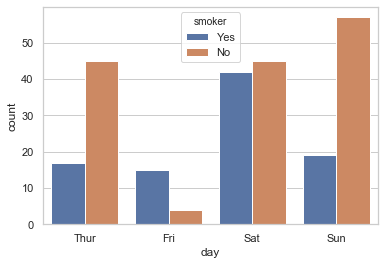

In [23]:
sns.countplot(x="day", hue="smoker", data = tips)

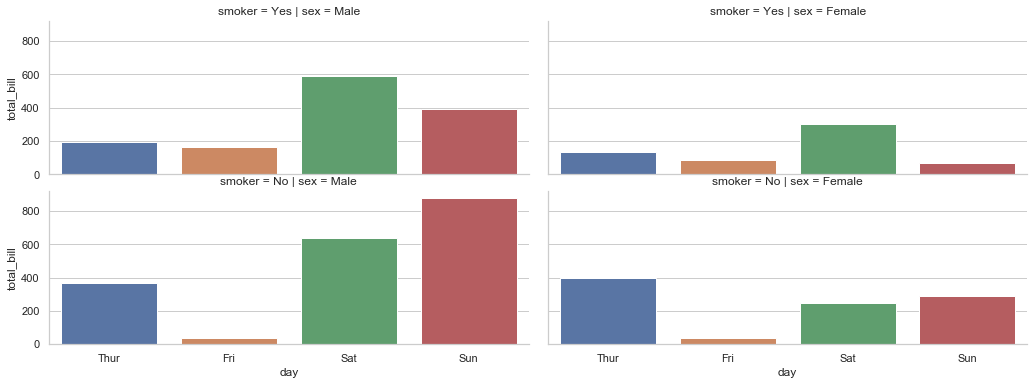

In [28]:
ax = sns.catplot(x="day",y="total_bill",data=tips,  col="sex", row="smoker", ci = False, kind='bar', estimator=sum)
ax.fig.set_size_inches(15,5)

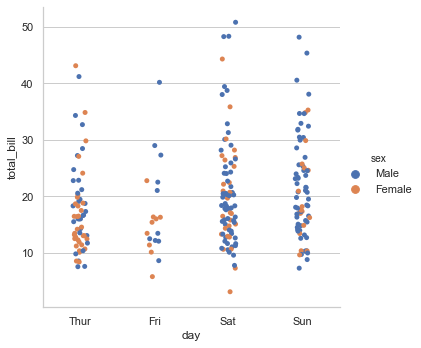

In [37]:
sns.catplot(x="day",y="total_bill",data=tips, hue='sex')   # Strip plot

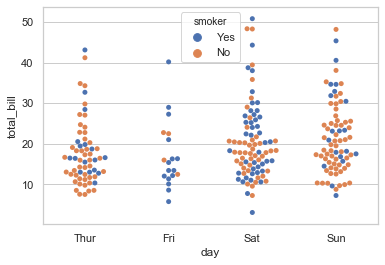

In [30]:
sns.swarmplot(x="day",y="total_bill", hue='smoker',data=tips)   # Swarn plot

## Flights 

In [31]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [31]:
flights.groupby('month')['passengers'].sum()

month
January      2901
February     2820
March        3242
April        3205
May          3262
June         3740
July         4216
August       4213
September    3629
October      3199
November     2794
December     3142
Name: passengers, dtype: int64

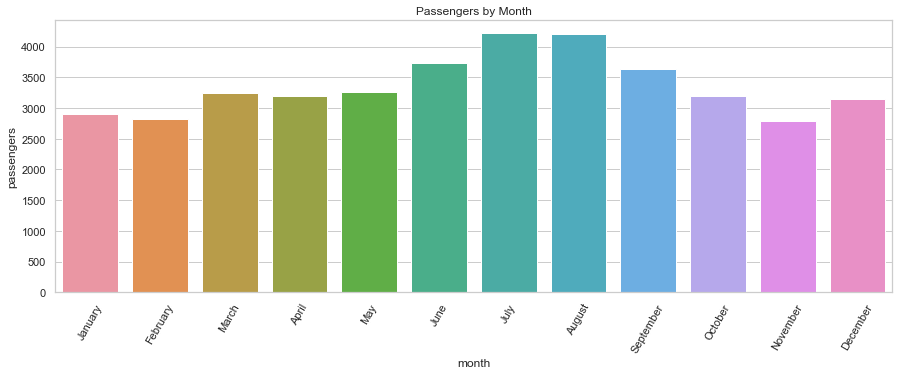

In [32]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=60)
plt.title('Passengers by Month')
sns.barplot(x="month",y="passengers",data=flights,ci=False,estimator=np.sum)

## Relational plots

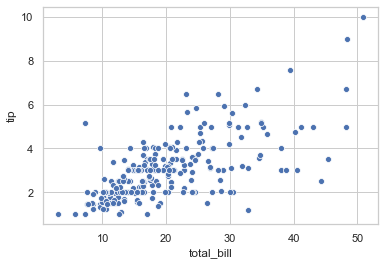

In [33]:
sns.scatterplot(x="total_bill",y="tip", data=tips) 

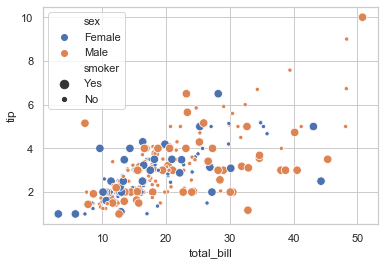

In [18]:
sns.scatterplot(x="total_bill",y="tip", data=tips, hue="sex", size="smoker")

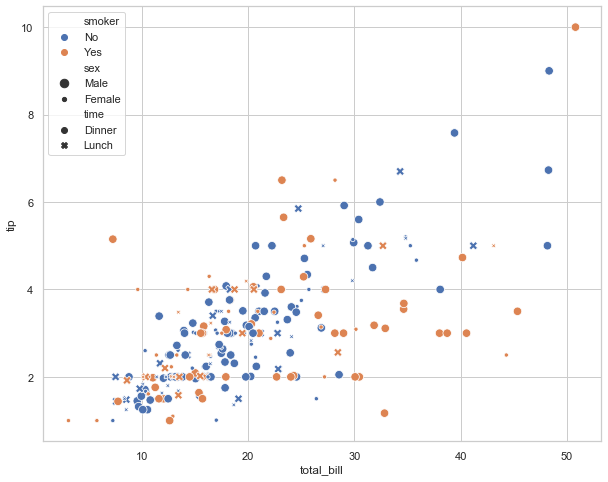

In [35]:
sns.scatterplot(x="total_bill",y="tip",hue="smoker", size='sex', style="time", data=tips)
plt.gcf().set_size_inches(10,8)

In [22]:
flights.head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


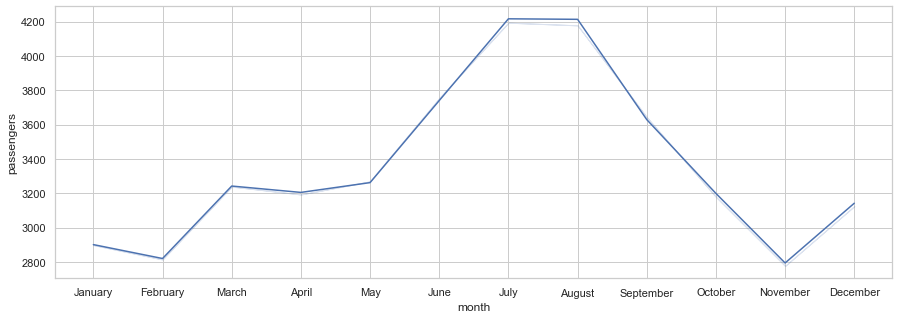

In [39]:
sns.lineplot(x='month', y = 'passengers', estimator=sum, data = flights, ci= False)
plt.gcf().set_size_inches(15,5)

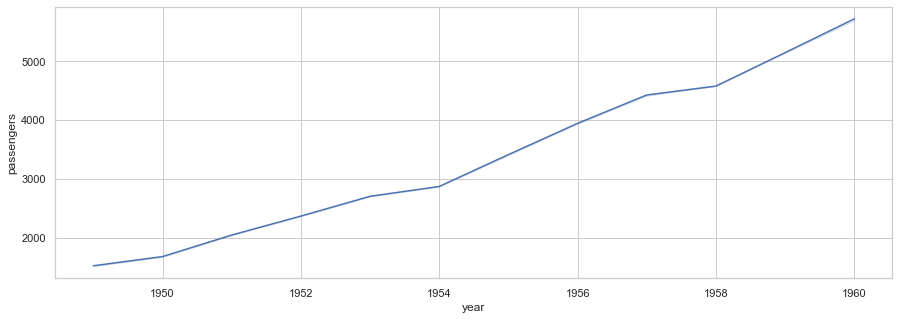

In [40]:
plt.figure(figsize=(15,5))
sns.lineplot(x="year", y="passengers", estimator=sum, data=flights,ci=False)

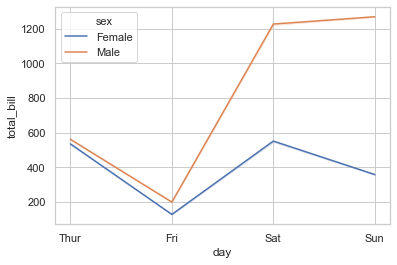

In [42]:
sns.lineplot(x='day', y = 'total_bill', data=tips, estimator=sum, hue='sex', ci= False)

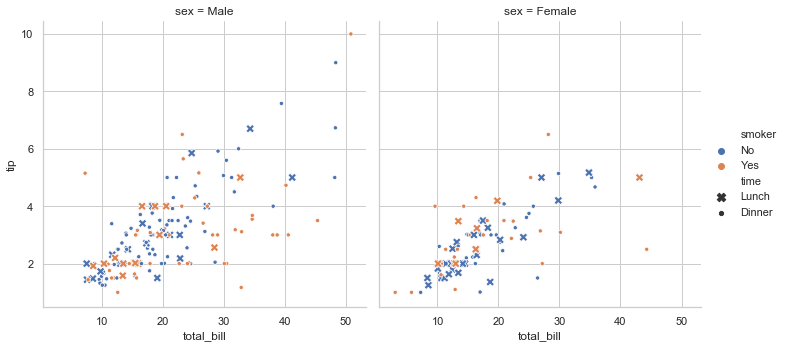

In [25]:
# Figure level 
sns.relplot(x="total_bill",y="tip",col="sex", hue="smoker", size="time",style='time', data=tips)

## Distribution plots

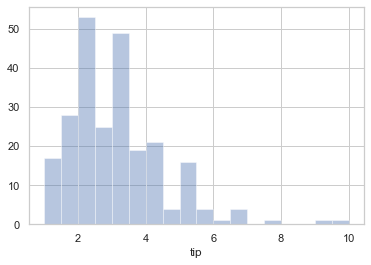

In [5]:
sns.distplot(tips['tip'],kde=False)

### pairplot

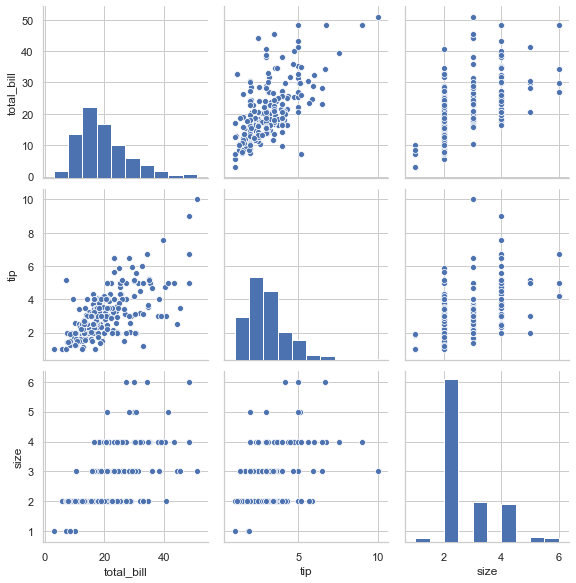

In [8]:
sns.pairplot(tips,vars=['total_bill','tip','size'], diag_kind='hist')
plt.gcf().set_size_inches(8,8)

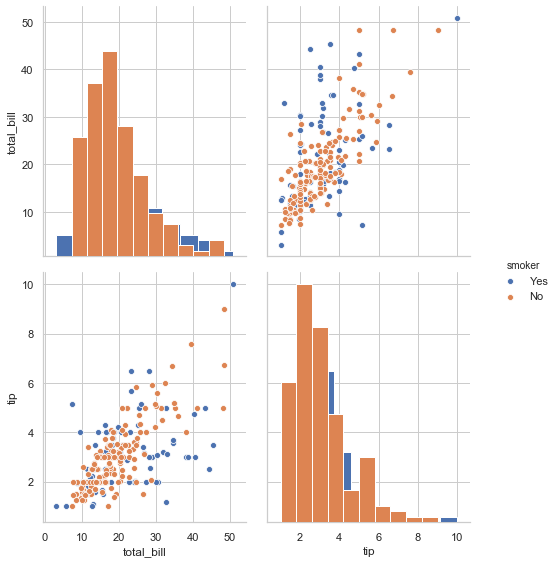

In [10]:
sns.pairplot(tips,vars=['total_bill','tip'],hue="smoker", diag_kind='hist')
plt.gcf().set_size_inches(8,8)

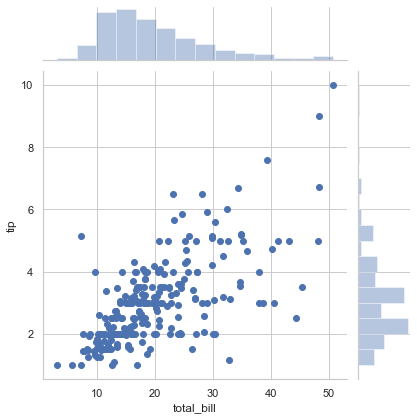

In [11]:
sns.jointplot(x='total_bill', y = 'tip', data = tips)

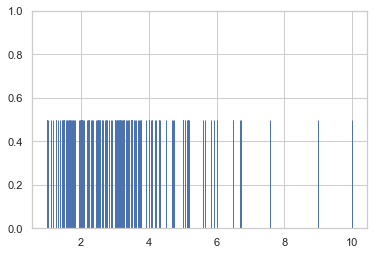

In [14]:
sns.rugplot(tips['tip'],height=.5)

### Regression Plot

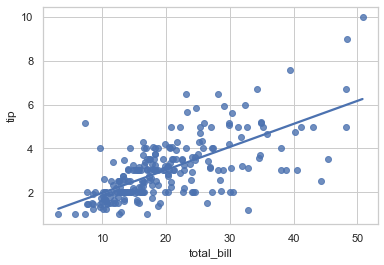

In [26]:
sns.regplot(x="total_bill",y='tip', data=tips, ci=False)

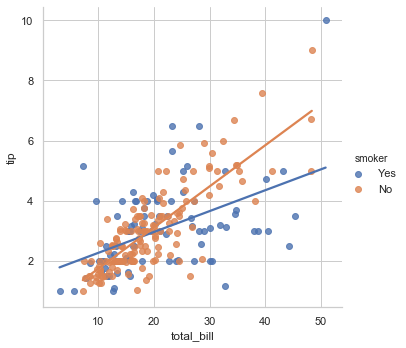

In [28]:
sns.lmplot(x="total_bill",y='tip',hue="smoker", data=tips,ci=False)

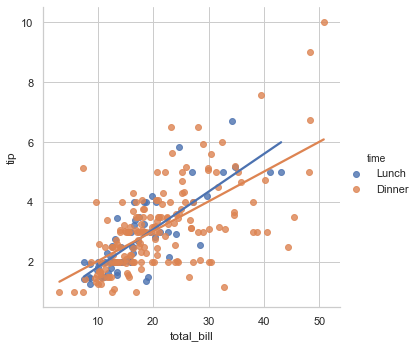

In [29]:
sns.lmplot(x="total_bill",y='tip',hue="time",data=tips,ci=False)

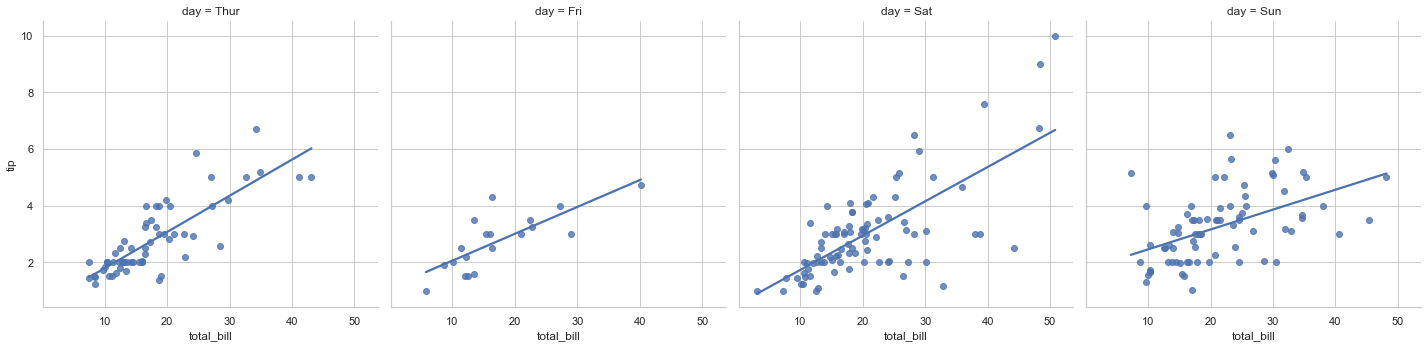

In [30]:
sns.lmplot(x="total_bill",y='tip',col='day', data=tips,ci=False)

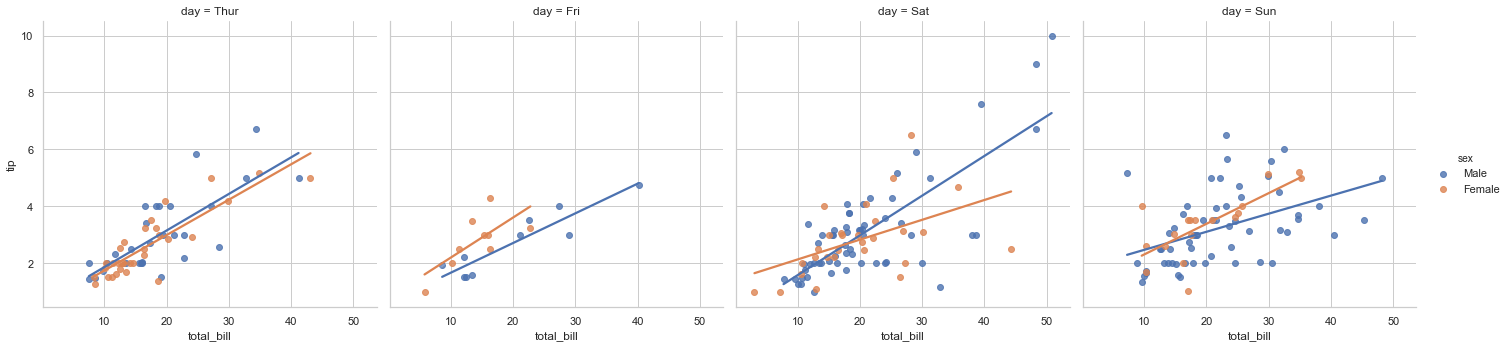

In [31]:
sns.lmplot(x="total_bill",y='tip',col='day', hue='sex', data=tips,ci=False)

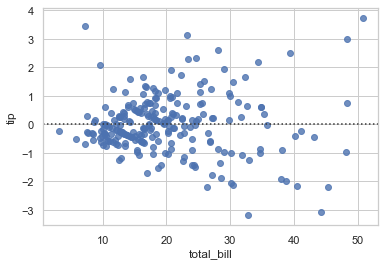

In [19]:
sns.residplot(x="total_bill",y='tip', data=tips)

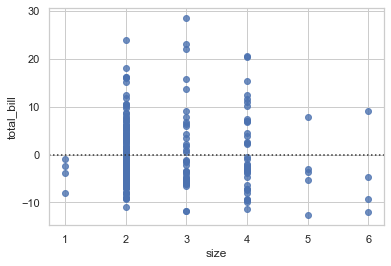

In [32]:
sns.residplot(x="size",y='total_bill', data=tips)

### Matrix plots

In [24]:
day_tips = tips.groupby('day', as_index=False)['tip','total_bill'].sum()

In [25]:
day_tips

,day,tip,total_bill
0,Thur,171.83,1096.33
1,Fri,51.96,325.88
2,Sat,260.40,1778.40
3,Sun,247.39,1627.16


In [34]:
ds = tips.pivot_table (index = "day", columns = "time", values="total_bill", aggfunc=np.sum)

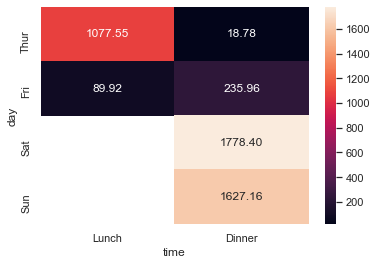

In [36]:
sns.heatmap(ds, annot=True,fmt=".2f")

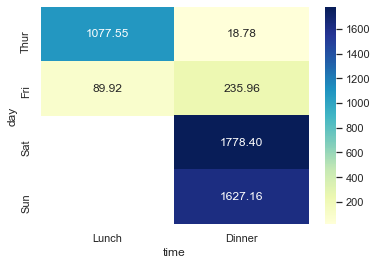

In [37]:
sns.heatmap(ds, annot=True,fmt=".2f",cmap='YlGnBu')

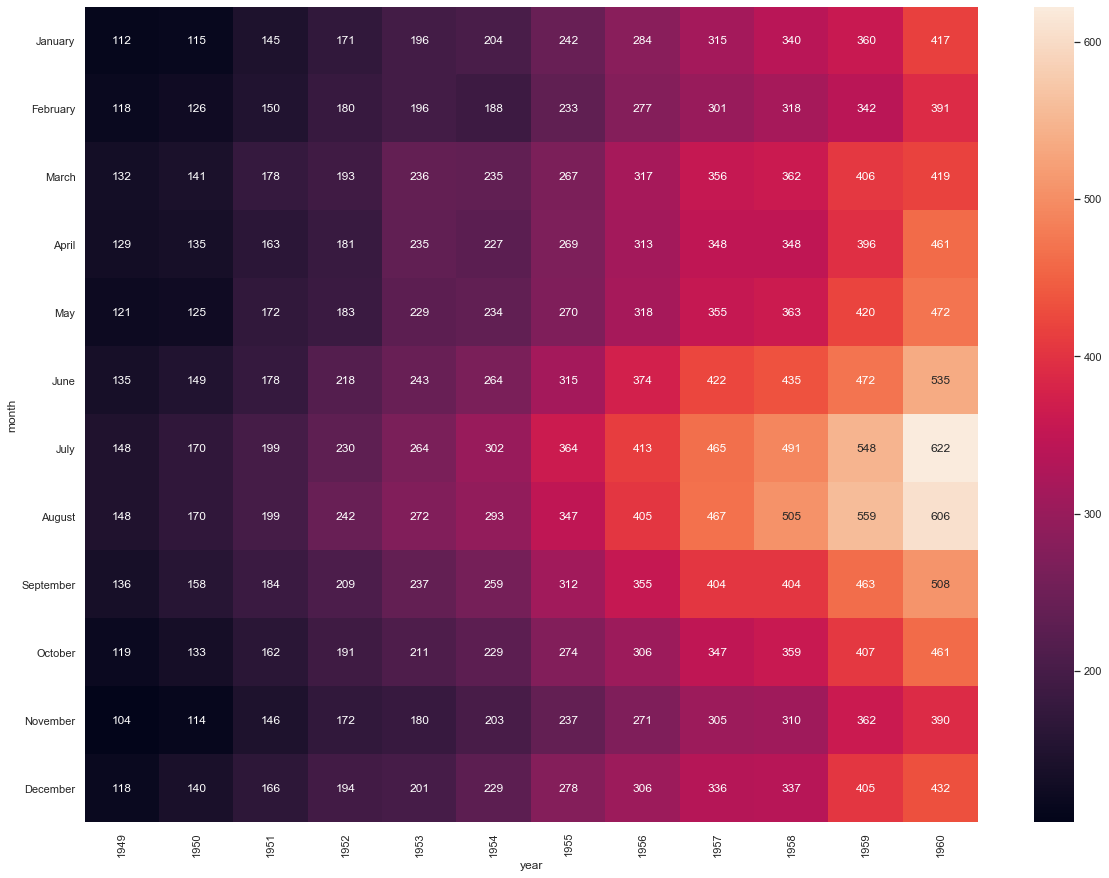

In [41]:
fl_summary = flights.pivot('month','year','passengers')
# print(fl_summary)
ax = sns.heatmap(fl_summary,annot=True, fmt=".0f")
plt.gcf().set_size_inches(20,15)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


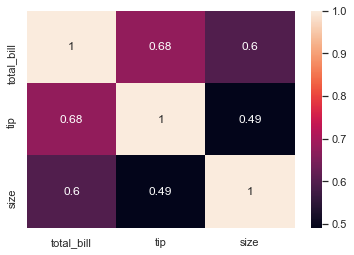

In [43]:
cm = tips.corr()
print(cm)
sns.heatmap(cm, annot=True)

In [26]:
tips['sm_code'] = tips.smoker.apply(lambda v : 1 if v == 'Yes' else 0)
tips.sm_code = tips.sm_code.astype('int32')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   sm_code     244 non-null    int32   
dtypes: category(4), float64(2), int32(1), int64(1)
memory usage: 8.2 KB


            total_bill       tip      size   sm_code
total_bill    1.000000  0.675734  0.598315  0.085721
tip           0.675734  1.000000  0.489299  0.005929
size          0.598315  0.489299  1.000000 -0.133178
sm_code       0.085721  0.005929 -0.133178  1.000000


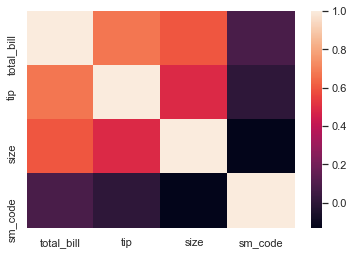

In [27]:
cm = tips.corr()
print(cm)
sns.heatmap(cm)